> Please read this : I have not included much explaination in this code because they are preety easy to understand. If you are finding anything complex, please let me know i will explain that.

# Introduction

Topics Covered :-

1. Functional API (Concat Layers)
2. Multiple Inputs
3. Multiple Outputs

> I am using Keras and Tensorflow to build these models.

![](https://2.bp.blogspot.com/-wkrmRibw_GM/V3Mg3O3Q0-I/AAAAAAAABG0/Jm3Nl4-VcYIJ44dA5nSz6vpTyCKF2KWQgCKgB/s640/image03.png)

Read more about [Wide Deep Neural Networks](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()
type(housing)

sklearn.utils.Bunch

In [4]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

> Let us make train and dev set to build our model and I will use test set to evaluate at end.

In [5]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Functional API

## Concat Layers

The Keras functional API is a way to create models that is more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, models with shared layers, and models with multiple inputs or outputs.

The main idea that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [7]:
from tensorflow import keras

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

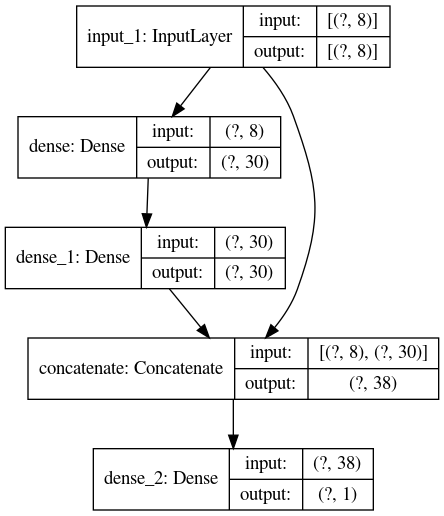

In [9]:
keras.utils.plot_model(model,'wide_alpha.png',show_shapes=True)

In [10]:
model.compile(loss = 'mean_squared_error',optimizer=keras.optimizers.SGD(lr = 1e-3))

In [11]:
history = model.fit(X_train,y_train,
          epochs = 50,
          validation_data = (X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.0537 - val_loss: 0.7735
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.6999 - val_loss: 0.6695
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6334 - val_loss: 0.6297
Epoch 4/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5986 - val_loss: 0.6030
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5741 - val_loss: 0.5839
Epoch 6/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5672
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5399 - val_loss: 0.5538
Epoch 8/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5267 - val_loss: 0.5451
Epoch 9/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5165 - val_loss: 0.5343
Epoch 10/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5082 - val_loss: 0.5298

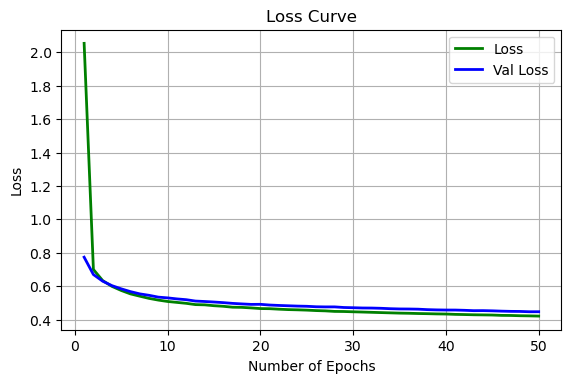

In [12]:
fig = plt.figure(dpi = 100,figsize = (5,3))
ax = fig.add_axes([1,1,1,1])
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
ax.plot(epochs,loss,lw = 2,color = 'green',label = 'Loss')
ax.plot(epochs,val_loss,lw = 2,color = 'blue',label = 'Val Loss')
plt.grid(True)
plt.legend()
ax.set(xlabel = 'Number of Epochs',ylabel = 'Loss',title = 'Loss Curve')
plt.show()

> Now let us predict outcome for first three observation in our test set.

In [13]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[2.2800326],
       [1.909385 ],
       [0.6595856]], dtype=float32)

# Multiple Inputs

Network with multiple inputs, I will overlap some inputs. I will pass 5 features directly to output layer and 6 features to Deep Networks.

In [14]:
input_A = keras.layers.Input(shape = [5],name = 'wide_input')
input_B = keras.layers.Input(shape = [6],name = 'deep_input')

hidden1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A,hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs = [input_A,input_B],outputs = [output])

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

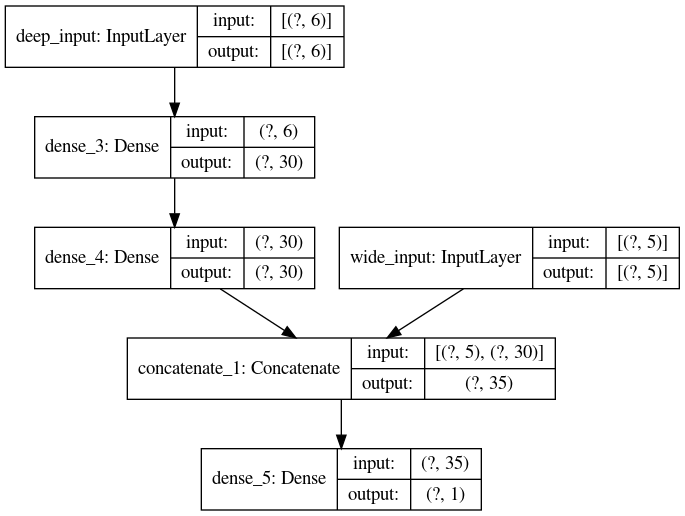

In [16]:
keras.utils.plot_model(model,'multi.png',show_shapes=True)

In [17]:
model.compile(loss = 'mean_squared_error',optimizer=keras.optimizers.SGD(lr = 1e-3))

> As we are passing two inputs, We need two input set. Let us make that.

In [18]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [19]:
history = model.fit((X_train_A,X_train_B),y_train,
          epochs = 50,
          validation_data = ((X_valid_A,X_valid_B),y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.3907 - val_loss: 1.0153
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.8064 - val_loss: 0.7399
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6620 - val_loss: 0.6615
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6143 - val_loss: 0.6225
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5866 - val_loss: 0.5985
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5686 - val_loss: 0.5820
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5543 - val_loss: 0.5679
Epoch 8/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5423 - val_loss: 0.5570
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5317 - val_loss: 0.5472
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5234 - val_loss: 0.5390

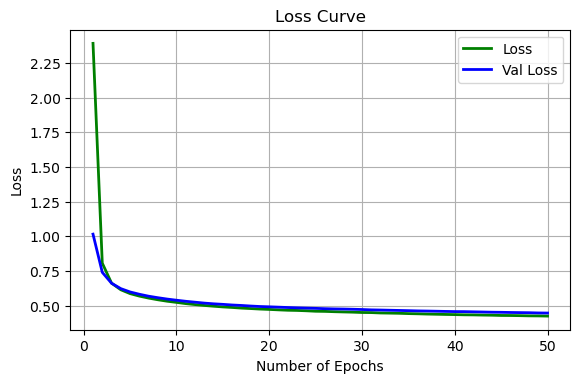

In [20]:
fig = plt.figure(dpi = 100,figsize = (5,3))
ax = fig.add_axes([1,1,1,1])
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
ax.plot(epochs,loss,lw = 2,color = 'green',label = 'Loss')
ax.plot(epochs,val_loss,lw = 2,color = 'blue',label = 'Val Loss')
plt.grid(True)
plt.legend()
ax.set(xlabel = 'Number of Epochs',ylabel = 'Loss',title = 'Loss Curve')
plt.show()

In [21]:
y_pred = model.predict((X_new_A,X_new_B))
y_pred

array([[2.1336489],
       [2.0388255],
       [0.9519583]], dtype=float32)

# Multiple Outputs

Now build a model with multiple inputs as well as multiple outputs.

In [22]:
input_A = keras.layers.Input(shape = [5],name = 'wide_input')
input_B = keras.layers.Input(shape = [6],name = 'deep_input')

hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A,hidden2])

output = keras.layers.Dense(1,name = 'main_output')(concat)
aux_output = keras.layers.Dense(1,name = 'aux_output')(hidden2)

model = keras.Model(inputs = [input_A,input_B],outputs = [output,aux_output])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
____________________________________________________________________________________________

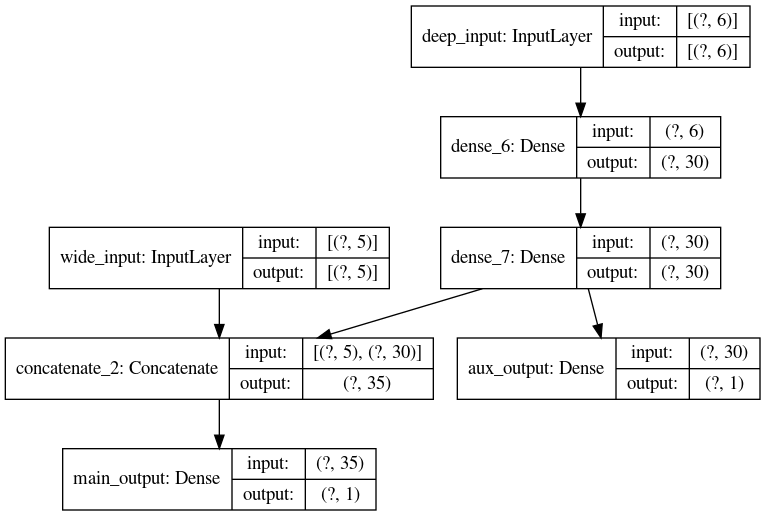

In [23]:
keras.utils.plot_model(model,'complex.png',show_shapes=True)

In [24]:
model.compile(loss = ['mse','mse'],loss_weights = [0.9,0.1],optimizer='sgd')

> I am using same target at both outputs , So i am passing y_train multiple times.

In [25]:
history = model.fit((X_train_A,X_train_B),(y_train,y_train),
          epochs = 50,
          validation_data = ((X_valid_A,X_valid_B),(y_valid,y_valid)))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.1649 - main_output_loss: 2.0943 - aux_output_loss: 2.8000 - val_loss: 0.8855 - val_main_output_loss: 0.8107 - val_aux_output_loss: 1.5591
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.9151 - main_output_loss: 0.8512 - aux_output_loss: 1.4902 - val_loss: 0.5731 - val_main_output_loss: 0.4882 - val_aux_output_loss: 1.3369
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5359 - main_output_loss: 0.4606 - aux_output_loss: 1.2136 - val_loss: 0.5181 - val_main_output_loss: 0.4452 - val_aux_output_loss: 1.1743
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4994 - main_output_loss: 0.4379 - aux_output_loss: 1.0522 - val_loss: 0.4804 - val_main_output_loss: 0.4192 - val_aux_output_loss: 1.0317
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4557 - main_output_loss: 0.4050 - aux_output_loss: 0.9122 - val_loss

In [26]:
pd.DataFrame(history.history).head()

,loss,main_output_loss,aux_output_loss,val_loss,val_main_output_loss,val_aux_output_loss
0,2.164882,2.094315,2.799978,0.885495,0.810650,1.559099
1,0.915095,0.851190,1.490242,0.573115,0.488248,1.336908
2,0.535911,0.460612,1.213602,0.518103,0.445193,1.174295
3,0.499377,0.437947,1.052248,0.480424,0.419176,1.031659
4,0.455692,0.404973,0.912163,0.457552,0.409398,0.890930


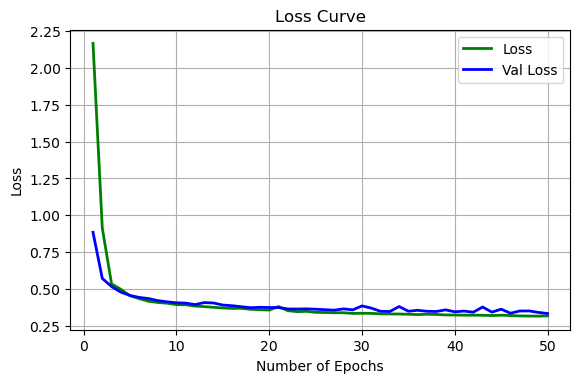

In [27]:
fig = plt.figure(dpi = 100,figsize = (5,3))
ax = fig.add_axes([1,1,1,1])
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
ax.plot(epochs,loss,lw = 2,color = 'green',label = 'Loss')
ax.plot(epochs,val_loss,lw = 2,color = 'blue',label = 'Val Loss')
plt.grid(True)
plt.legend()
ax.set(xlabel = 'Number of Epochs',ylabel = 'Loss',title = 'Loss Curve')
plt.show()

> Evaluate returns total_loss, main_loss and aux_loss.

In [28]:
total_loss,main_loss,aux_loss = model.evaluate((X_test_A,X_test_B),
                                               (y_test,y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3393 - main_output_loss: 0.3295 - aux_output_loss: 0.4274


> We can also predict at each output.

In [29]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])

In [30]:
y_pred_main

array([[1.6964865],
       [1.5565675],
       [1.0015845]], dtype=float32)

In [31]:
y_pred_aux

array([[1.3627712],
       [1.4719335],
       [1.0232503]], dtype=float32)

> Thank you for reading my notebook. Let me know how you find this useful. Happy Learning !!